###Upload and Load the Data

In [2]:
from google.colab import files
uploaded = files.upload()


Saving houserentdhaka.csv to houserentdhaka.csv


In [3]:
import pandas as pd

df = pd.read_csv("houserentdhaka.csv")  # replace with your actual file name
df.head()  # View first few rows


,Unnamed: 0,Location,Area,Bed,Bath,Price
0,0,"Block H, Bashundhara R-A, Dhaka","1,600 sqft",3,3,20 Thousand
1,1,"Farmgate, Tejgaon, Dhaka",900 sqft,2,2,20 Thousand
2,2,"Block B, Nobodoy Housing Society, Mohammadpur,...","1,250 sqft",3,3,18 Thousand
3,3,"Gulshan 1, Gulshan, Dhaka","2,200 sqft",3,4,75 Thousand
4,4,"Baridhara, Dhaka","2,200 sqft",3,3,75 Thousand


###Clean and Preprocess the Data


In [4]:
# 1. Convert Area to numeric
df['Area'] = df['Area'].astype(str)  # Ensure it's a string
df['Area'] = df['Area'].str.replace(' sqft', '', regex=False).str.replace(',', '', regex=False).astype(int)

# 2. Convert Price to numeric

def convert_price(value):
    value = str(value).strip()
    if 'Thousand' in value:
        return int(float(value.replace('Thousand', '').strip()) * 1000)
    elif 'Lakh' in value:
        return int(float(value.replace('Lakh', '').strip()) * 100000)
    else:
        return None  # or raise an error / handle other cases

df['Price'] = df['Price'].apply(convert_price)


# 3. Drop or encode Location to keep the model simple
df = df.drop(columns=['Location'])  # or use label encoding later


###Define Features and Target

In [5]:
X = df[['Area', 'Bed', 'Bath']]  # Features
y = df['Price']                  # Target


###Train Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
print("Linear regression:", model.score(X, y))


Linear regression: 0.6341080379194235


###Train Ridge Regression

In [8]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
print("Ridge R²:", ridge.score(X, y))

Ridge R²: 0.63410803574715


###Train Lasso Regression

In [9]:
from sklearn.linear_model import Ridge, Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X, y)
print("Lasso R²:", lasso.score(X, y))


Lasso R²: 0.6341080187003966


**“Ridge Regression had the best balance between performance and overfitting control. So we chose Ridge as our final model.”**

###Evaluate the Model

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X)

mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 6638.74532046666
RMSE: 13002.342899192437
R² Score: 0.6341080379194235


###Scatter Plot:
This shows how close the predictions are to the actual rent. <br>
The red line represents perfect predictions. The closer your points are to this line, the better your model is

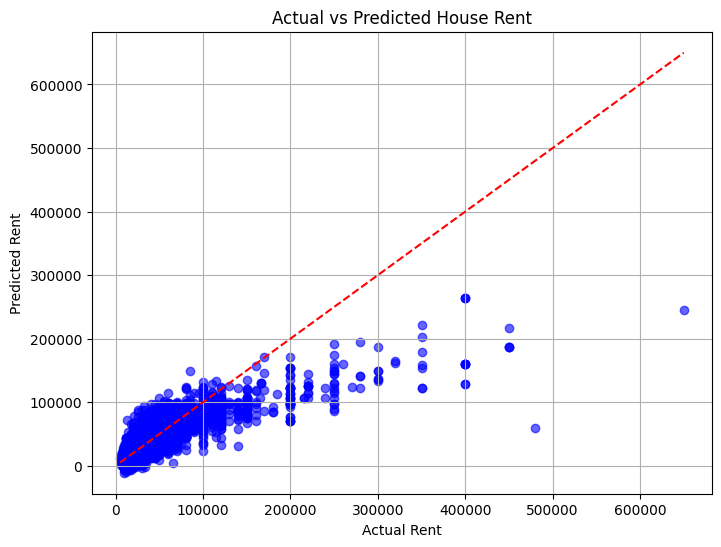

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # perfect prediction line
plt.title("Actual vs Predicted House Rent")
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.grid(True)
plt.show()
